# Aula 5 - Hipóteses mais complexas e regularização

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Hipóteses mais complexas
- 2) Regularização

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

____
____
____

_____

## 1) Hipóteses mais complexas

Muitas vezes, temos dados que simplesmente não se ajustam às hipóteses simples, lineares, que conhecemos até o momento.

Quando isso acontece, é muito provável que soframos **underfitting**, pois uma forma funcional demasiadamente simples de uma hipótese simplesmente pode não ser capaz de capturar o comportamento de uma função teórica $\mathcal{F}$ mais complexa, conforme refletido pela amostra.

Nestes casos, o remédio é simples: basta escolhermos hipóteses mais complexas!

Pra começar nosso estudo, vamos utilizar dados bem simples do próprio sklearn (submódulo [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)):


In [33]:
# importando a função make_regression

from sklearn.datasets import make_regression

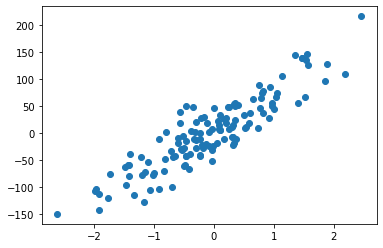

In [34]:
# gerando dados 2D (uma feature, 1 target)
# a função retorna X, y

X, y = make_regression(n_samples = 130, n_features = 1, 
                       noise = 30, tail_strength = 10,
                       random_state = 42)

plt.scatter(X, y)
plt.show()

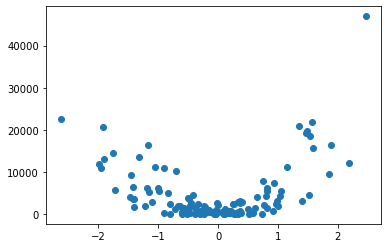

In [35]:
# multiplique o target por alguma potência pra gerar um problema polinomial
y = y ** 2

plt.scatter(X, y)
plt.show()

Podemos fazer uma regressão linear...

Intercepto: 4391.919999157726
Coeficienter angular: [527.6413485]

####################################################



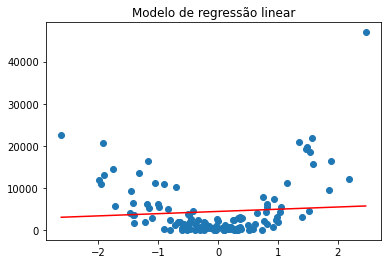


####################################################



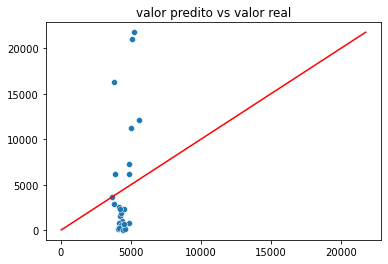

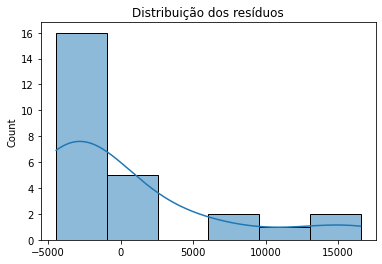


####################################################


Métricas de avaliação:
R^2: 0.06072497099435392
MAE: 4576.315548306653
MSE: 37453489.07386097
RMSE: 6119.925577477309

Performance da base de treino:
R^2: 0.005491080740746224
MAE: 4514.5579573039395
MSE: 45312695.9031064
RMSE: 6731.470560219839


In [36]:
# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

plt.scatter(X, y)

x_plot_modelo = np.linspace(X.min(), X.max(), 100000)

y_plot_modelo = modelo.intercept_ + modelo.coef_[0]*x_plot_modelo

plt.plot(x_plot_modelo, y_plot_modelo, color="red")
plt.show()

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 5) METRICAS DE TREINO
print("\nPerformance da base de treino:")
y_pred_train = modelo.predict(X_train)

print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Naturalmente, temos métricas bem ruins, dada a escolha ruim de hipótese!

Vamos fazer algo melhor: como nossos dados são aproximadamente quadráticos, faria sentido escolher uma **hipótese quadrática**, não é mesmo? Isto é,

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$$

E é aqui que entra um dos aspectos mais importantes de um modelo linear como a regressão linear: **o modelo é linear nos parâmetros, não necessariamente nas features!**.

Ou seja, o termo quadrado que incluímos **pode ser considerado como uma nova feature linear**. Para ver isso, basta definir $z \equiv x^2$, que voltamos a ter uma hipótese linear, mas agora em duas variáveis:

$$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$$

Ou seja, ainda temos uma regressão linear (múltipla, agora).

E isso é verdade para **qualquer** combinação de features que possamos criar!

________

Um outro exemplo: considere uma hipótese linear para um modelo com duas features $x_1, x_2$:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2$$

Caso queiramos produzir um modelo quadrático, temos que incluir os termos $x_1^2, x_2^2$ e também $x_1x_2$ (que também é quadrático), de modo que nossa hipótese fica sendo:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2 + b_3 x_1^2 + b_4 x_2^2 + b_5 x_1 x_2$$

O que não deixa de ser uma **regressão linear múltipla** de 5 variáveis ($x_3 \equiv x_1^2$, $x_4 \equiv x_2^2$ e $x_5 \equiv x_1x_2$):

$$f_{h, \  \vec{b}}(x_1, x_2, x_3, x_4, x_5) = b_0 + b_1x_1 + b_2x_2 + b_3 x_3 + b_4 x_4 + b_5 x_5$$

E assim por diante! ;)

Assim, para criarmos um modelo quadrático para nossos dados, bastaria criarmos uma nova feature $z = x^2$, e passar apenas esta nova feature para o  modelo de regressão linear **simples**. Isso equivale a usar uma hipótese $$f_{h, \  \vec{b}}(z) = b_0 + b_1z = b_0 + b_1x^2$$

Vejamos:

Intercepto: 399.70950525830494
Coeficienter angular: [4326.85522612]

####################################################



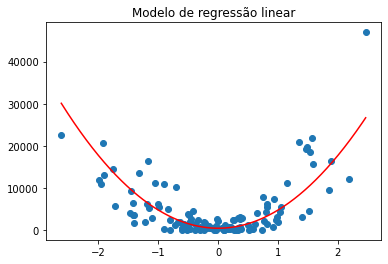


####################################################



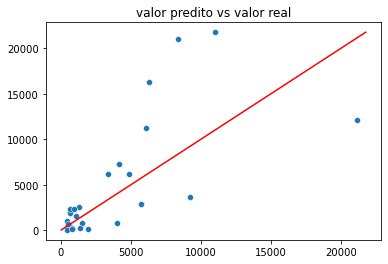

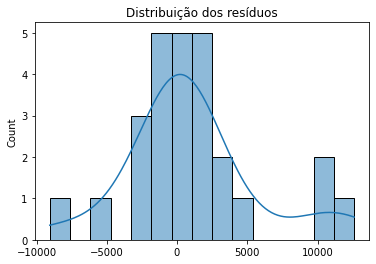


####################################################


Métricas de avaliação:
R^2: 0.45371957211123026
MAE: 3023.51273101609
MSE: 21782872.327454526
RMSE: 4667.212479355801


In [6]:
# criando a nova feature:

Z = X**2

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

# note que passamos a nova feature Z!!
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

plt.scatter(X, y)

x_plot_modelo = np.linspace(X.min(), X.max(), 100000)

y_plot_modelo = modelo.intercept_ + modelo.coef_[0]*(x_plot_modelo)**2

plt.plot(x_plot_modelo, y_plot_modelo, color="red")
plt.show()

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Agora sim, um modelo beeem melhor!!

E se quisermos usar a hipótese quadrática mais completa, com ambos os termos linear e quadrático? (Isto é, $f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$)

Bem simples: basta passarmos as duas features pro sklearn:

In [7]:
# transformando o array em dataframe

X_df = pd.DataFrame(X, columns=["X"])

X_df

,X
0,-1.918771
1,-1.150994
2,0.821903
3,-0.299007
4,-0.234137
...,...
125,-0.327662
126,2.190456
127,-0.013497
128,-0.234587


In [8]:
# criando a nova coluna

X_df["Z"] = X_df["X"]**2

X_df

,X,Z
0,-1.918771,3.681683
1,-1.150994,1.324786
2,0.821903,0.675524
3,-0.299007,0.089405
4,-0.234137,0.054820
...,...,...
125,-0.327662,0.107362
126,2.190456,4.798096
127,-0.013497,0.000182
128,-0.234587,0.055031


In [9]:
X_df["X"]

0     -1.918771
1     -1.150994
2      0.821903
3     -0.299007
4     -0.234137
         ...   
125   -0.327662
126    2.190456
127   -0.013497
128   -0.234587
129   -1.328186
Name: X, Length: 130, dtype: float64

In [10]:
modelo.intercept_

399.70950525830494

In [11]:
modelo.coef_

array([4326.85522612])

Intercepto: 394.96707516156766
Coeficienter angular: [1529.24448992 4509.45825241]

####################################################



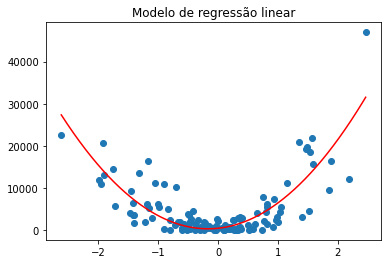


####################################################



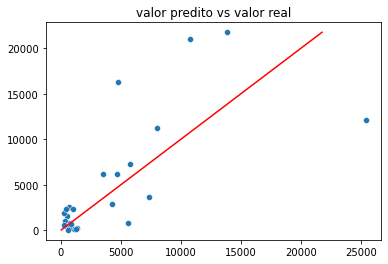

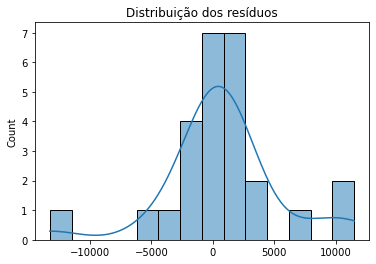


####################################################


Métricas de avaliação:
R^2: 0.4660007116884177
MAE: 2884.1535533231854
MSE: 21293163.22973083
RMSE: 4614.451563266303


In [12]:
# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

plt.scatter(X_df["X"], y)

x_plot_modelo = np.linspace(X_df["X"].min(), X_df["X"].max(), 100000)

# f_h = b0 + b1*x + b2*x^2
y_plot_modelo = modelo.intercept_ + modelo.coef_[0]*x_plot_modelo + modelo.coef_[1]*(x_plot_modelo)**2

plt.plot(x_plot_modelo, y_plot_modelo, color="red")
plt.show()

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

No geral, dá pra ir aumentando a ordem dos polinomios criando features de ordem maior uma a uma:

In [13]:
X_df["A"] = X_df["X"]**3

In [14]:
X_df

,X,Z,A
0,-1.918771,3.681683,-7.064307
1,-1.150994,1.324786,-1.524820
2,0.821903,0.675524,0.555215
3,-0.299007,0.089405,-0.026733
4,-0.234137,0.054820,-0.012835
...,...,...,...
125,-0.327662,0.107362,-0.035179
126,2.190456,4.798096,10.510016
127,-0.013497,0.000182,-0.000002
128,-0.234587,0.055031,-0.012910


Intercepto: 226.0013246456174
Coeficienter angular: [-699.21998753 4705.47333274  827.24558542]

####################################################



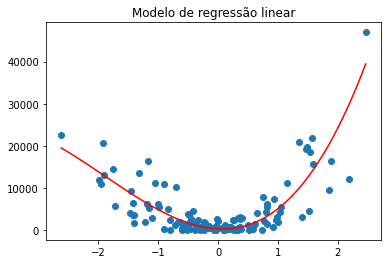


####################################################



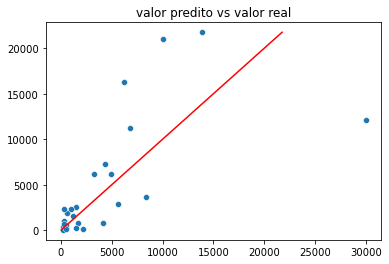

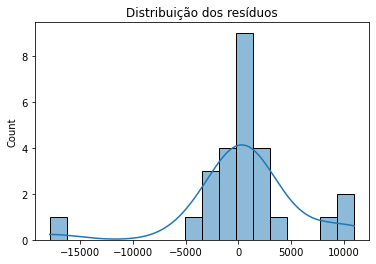


####################################################


Métricas de avaliação:
R^2: 0.3241628892420111
MAE: 3136.4528065095074
MSE: 26948930.8901152
RMSE: 5191.235969411832


In [15]:
# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

plt.scatter(X_df["X"], y)

x_plot_modelo = np.linspace(X_df["X"].min(), X_df["X"].max(), 100000)

# f_h = b0 + b1*x + b2*x^2
y_plot_modelo = modelo.intercept_ + modelo.coef_[0]*x_plot_modelo + modelo.coef_[1]*(x_plot_modelo)**2 + modelo.coef_[2]*(x_plot_modelo)**3

 
plt.plot(x_plot_modelo, y_plot_modelo, color="red")
plt.show()

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

O procedimento acima é bem manual. Pra nossa sorte, o sklearn existe, e uma de suas muitas ferramentas especiais para machine learning (no caso, pré-processamento) é o [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que permite a criação de toda as combinações polinomiais de features automaticamente!

O PolynomialFeatures é nosso primeiro exemplo de **transformer** do sklearn - um método cujo objetivo é aplicar alguma **transformação** aos dados. Veremos vários outros exemplos de transformers durante o curso.

Em particular, todos os transformers se comportam como se fossem "modelos", no sentido de que eles devem ser "ajustados" aos dados -- por isso, eles também têm o método `.fit()` -- que ajusta o transformer aos dados; além do método `.transform()`, que efetivamente transforma os dados. Existe também o `.fit_transform()`, que faz as duas coisas ao mesmo tempo -- mas vamos evitar de usá-lo, por motivos que ficarão claros no futuro próximo.

In [16]:
# importando a classe PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# intanciando o objeto de transformação (atenção ao parâmetro "degree" e "include bias")
poly_transf = PolynomialFeatures(degree=2, include_bias = False)

# ajustando o transformer aos dados
poly_transf.fit(X)

# transformando os dados 
X_transf = poly_transf.transform(X)

In [17]:
X_transf

array([[-1.91877122e+00,  3.68168298e+00],
       [-1.15099358e+00,  1.32478622e+00],
       [ 8.21902504e-01,  6.75523727e-01],
       [-2.99007350e-01,  8.94053956e-02],
       [-2.34136957e-01,  5.48201146e-02],
       [ 2.96120277e-01,  8.76872185e-02],
       [-4.63417693e-01,  2.14755958e-01],
       [ 1.71368281e-01,  2.93670878e-02],
       [ 9.17607765e-02,  8.42004011e-03],
       [ 6.11676289e-01,  3.74147882e-01],
       [ 9.31280119e-01,  8.67282660e-01],
       [ 1.14282281e+00,  1.30604399e+00],
       [-7.44459158e-02,  5.54219437e-03],
       [ 3.28751110e-01,  1.08077292e-01],
       [-1.95967012e+00,  3.84030699e+00],
       [ 1.03099952e+00,  1.06296002e+00],
       [-6.01706612e-01,  3.62050847e-01],
       [-3.47117697e-02,  1.20490696e-03],
       [ 1.74577813e-01,  3.04774127e-02],
       [ 9.15402118e-01,  8.37961037e-01],
       [ 6.47688538e-01,  4.19500442e-01],
       [-2.34153375e-01,  5.48278029e-02],
       [-5.29760204e-01,  2.80645873e-01],
       [ 1.

In [18]:
poly_transf.powers_

array([[1],
       [2]], dtype=int64)

In [19]:
poly_transf.n_input_features_

1

In [20]:
poly_transf.n_output_features_

2

In [21]:
X_transf.shape[1]

2

In [22]:
list(range(X_transf.shape[1]))

[0, 1]

In [23]:
[f"X_{i+1}" for i in range(X_transf.shape[1])]

['X_1', 'X_2']

In [24]:
# criando um dataframe com os dados transformados:

pd.DataFrame(X_transf, columns = [f"X_{i+1}" for i in range(X_transf.shape[1])])

,X_1,X_2
0,-1.918771,3.681683
1,-1.150994,1.324786
2,0.821903,0.675524
3,-0.299007,0.089405
4,-0.234137,0.054820
...,...,...
125,-0.327662,0.107362
126,2.190456,4.798096
127,-0.013497,0.000182
128,-0.234587,0.055031


______

Tudo numa unica célula:

Intercepto: 394.9670751615695
Coeficienter angular: [1529.24448992 4509.45825241]

####################################################



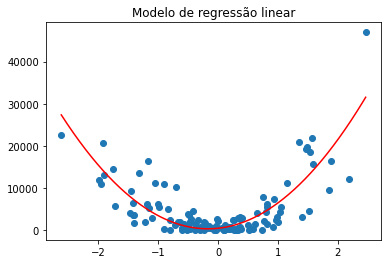


####################################################



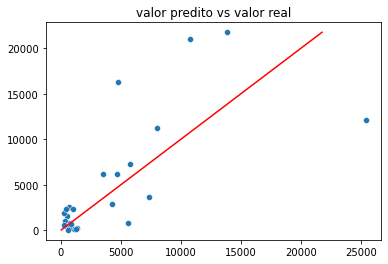

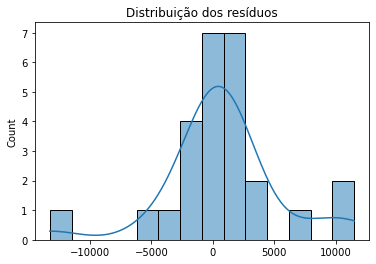


####################################################


Métricas de avaliação:
R^2: 0.4660007116884177
MAE: 2884.153553323185
MSE: 21293163.22973083
RMSE: 4614.451563266303


In [25]:
# pré-processamento

# importando a classe PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# intanciando o objeto de transformação (atenção ao parâmetro "degree" e "include bias")
poly_transf = PolynomialFeatures(degree=2, include_bias = False)

# ajustando o transformer aos dados
poly_transf.fit(X)

# transformando os dados 
X_transf = poly_transf.transform(X)

# features transformdas com o grau desejado
X_df = pd.DataFrame(X_transf, columns = [f"X_{i+1}" for i in range(X_transf.shape[1])])

########################################################
########################################################
########################################################
# MODELAGEM

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

plt.scatter(X_df["X_1"], y)

x_plot_modelo = np.linspace(X_df["X_1"].min(), X_df["X_1"].max(), 100000)

# f_h = b0 + b1*x + b2*x^2
y_plot_modelo = modelo.intercept_ 

for i in range(X_df.shape[1]):
    
    y_plot_modelo = y_plot_modelo + modelo.coef_[i] * x_plot_modelo**(i+1)
    
plt.plot(x_plot_modelo, y_plot_modelo, color="red")
plt.show()

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Vamos voltar pros dados da precificação de casa -- ali, o poly_features se mostrará ainda mais útil!

In [26]:
df = pd.read_csv("../datasets/house_prices.csv")

In [27]:
df = df.select_dtypes(include=np.number).dropna()

In [28]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [29]:
X = df.drop(columns=["Id", "SalePrice"])

In [30]:
y = df["SalePrice"]

Intercepto: 2555291940.531257
Coeficienter angular: [-1.53160293e+04  6.17526697e+03 -6.88263683e+02 -1.60964565e+05
 -1.88158574e+06 -1.39901772e+05 -8.64893479e+04  3.04491653e+02
 -2.64978613e+03  1.08374952e+04 -1.08870869e+04 -2.67301553e+03
  9.01051085e+03 -1.78248038e+03 -2.59554693e+01  7.19552061e+03
 -5.45975287e+06 -5.04500833e+06 -6.97076347e+06  4.06279426e+05
  3.58052476e+06 -8.91070647e+05 -3.28635067e+06  4.55316849e+06
  1.55101032e+04  1.36089114e+06  1.37393689e+04  1.22485762e+04
 -6.76810233e+03 -7.18350687e+04  2.73713826e+00 -7.72383253e+04
  9.90561003e-01  3.81870450e-01  2.97089343e+04 -2.32730942e+06
  3.22492665e-01 -4.52472249e+00  1.53991610e-02  2.70643420e+00
  4.91253716e+01  6.15969245e+00  1.24620493e+00  1.32234413e-01
 -3.73260044e-01 -2.20663277e-01 -2.02733938e-01 -8.45342049e-03
  1.55975430e+00  7.01061082e-01 -3.87730265e-01 -1.08684827e+00
 -4.22619884e+01 -2.06891271e+02 -7.75557380e+01  1.07382946e+02
 -9.37866120e+01  1.05493993e+03  3.54

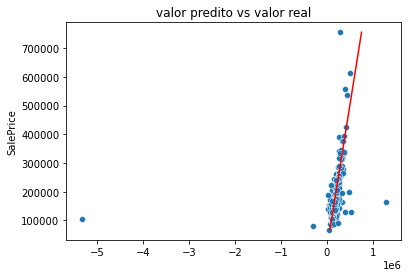

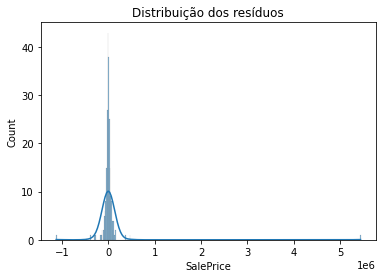


####################################################


Métricas de avaliação:
R^2: -17.034789998900692
MAE: 70166.9618218316
MSE: 142246177457.8849
RMSE: 377155.37575100915

Performance da base de treino:
R^2: 0.977768061677213
MAE: 8254.706077912557
MSE: 146887640.06424198
RMSE: 12119.721121553994


In [37]:
########################################################
########################################################
########################################################
# leitura e separação de features/target

df = pd.read_csv("../datasets/house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]


########################################################
########################################################
########################################################
# pré-processamento

# importando a classe PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# intanciando o objeto de transformação (atenção ao parâmetro "degree" e "include bias")
poly_transf = PolynomialFeatures(degree=2, include_bias = False)

# ajustando o transformer aos dados
poly_transf.fit(X)

# transformando os dados 
X_transf = poly_transf.transform(X)

# features transformdas com o grau desejado
X_df = pd.DataFrame(X_transf, columns = [f"X_{i+1}" for i in range(X_transf.shape[1])])

########################################################
########################################################
########################################################
# MODELAGEM

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# 5) METRICAS DE TREINO
print("\nPerformance da base de treino:")
y_pred_train = modelo.predict(X_train)

print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

In [39]:
poly_transf.n_input_features_

36

In [40]:
poly_transf.n_output_features_

702

____
____
____

_____

## 3) Regularização

Neste ponto, é muito importante que falemos sobre **regularização**.

O objetivo da regularização é **diminuir a complexidade** de modelos, de modo a evitar que particularidades da base de treino (ruídos) sejam aprendidos (ou seja, evitar overfitting!)

<img src=https://miro.medium.com/max/1838/1*aPFvwOYNAMxG-uPfByDLtw.png width=600>

### L1 (Lasso)

<img src="./anotações/l1.png" width=500>

### L2 (Ridge)

<img src="./anotações/l2.png" width=500>

Para saber como relacionar $t$ com $\lambda$, veja [este post](https://stats.stackexchange.com/questions/259177/expressing-the-lasso-regression-constraint-via-the-penalty-parameter) ou então [este](https://stats.stackexchange.com/questions/90648/kkt-versus-unconstrained-formulation-of-lasso-regression) -- discussões bem matemáticas!

<img src=https://ugc.futurelearn.com/uploads/assets/2b/fe/2bfe399e-503e-4eae-9138-a3d7da738713.png width=800>

Observações importantes:

- $\lambda$ é um parâmetro que controla a "força" da regularização
- **L1 pode zerar coeficientes** - faz feature selection
- **L2 apenas diminui o tamanho de coeficientes** - não faz feature selection

Geometricamente:

<img src=https://www.astroml.org/_images/fig_lasso_ridge_1.png width=800>



No sklearn, é possível fazer um modelo de regressão linear regularizado facilmente com as classes respectivas:

- [Regularização L2/Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

- [Regularização L1/Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Há, no sklearn, também uma implementação para um tipo de regularização conhecida como **Elastic Net**:

<img src=https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png width=600>

A classe se chama [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)



Vamos utilizar regularização no dataset das casas, juntamente com as features polinomiais:

Intercepto: -457586.59844781517
Coeficienter angular: [-2.09840235e+02 -6.22245251e+01  4.29203229e-01  1.96542920e+04
  5.07228946e+03  2.86898275e+02  1.25155507e+02  2.64927205e+01
  4.75018636e+00  4.49071348e+00 -3.00319582e+00  6.23770403e+00
  1.03503162e+01  1.39030809e+01  5.09112525e+00  2.93445223e+01
  1.15651290e+04  1.33874840e+03  5.01014376e+03 -1.95544480e+03
 -9.48684978e+03 -2.14750237e+04  4.58715787e+03  4.79391824e+03
 -1.73822466e+01  1.83445528e+04  5.86043038e+00  2.02568027e+01
 -3.14383329e+00  1.18478232e+01  5.86571031e+01  6.69736175e+01
 -6.19269025e+01 -3.91009199e+00 -5.28006128e+00 -1.91225833e+02]

####################################################



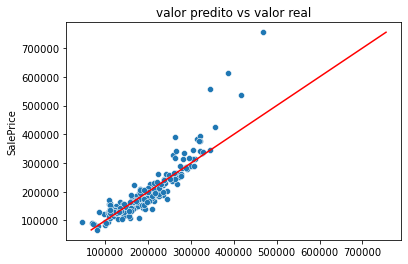

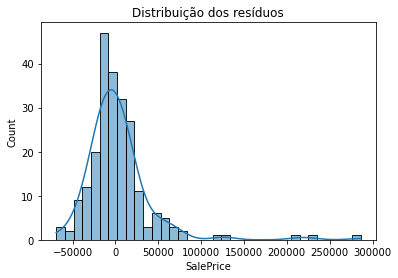


####################################################


Métricas de avaliação:
R^2: 0.7986350795736668
MAE: 23615.832878468467
MSE: 1588229760.7292914
RMSE: 39852.60042618664

Performance da base de treino:
R^2: 0.8080899207511311
MAE: 22141.30715927471
MSE: 1267960455.634901
RMSE: 35608.432366995614


In [47]:
########################################################
########################################################
########################################################
# leitura e separação de features/target

df = pd.read_csv("../datasets/house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]


########################################################
########################################################
########################################################
# pré-processamento

# importando a classe PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# intanciando o objeto de transformação (atenção ao parâmetro "degree" e "include bias")
poly_transf = PolynomialFeatures(degree=1, include_bias = False)

# ajustando o transformer aos dados
poly_transf.fit(X)

# transformando os dados 
X_transf = poly_transf.transform(X)

# features transformdas com o grau desejado
X_df = pd.DataFrame(X_transf, columns = [f"X_{i+1}" for i in range(X_transf.shape[1])])

########################################################
########################################################
########################################################
# MODELAGEM

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# 5) METRICAS DE TREINO
print("\nPerformance da base de treino:")
y_pred_train = modelo.predict(X_train)

print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Intercepto: 5250421.92566567
Coeficienter angular: [-3.46585188e+02  3.87686602e+01 -3.23104123e+02 -2.48202586e+01
 -1.62348090e+00 -6.51275178e+02 -5.90593625e+02 -6.53466783e+01
 -1.26174910e+02  1.45259597e+03 -3.13374052e+03 -1.80730965e+03
  9.00303787e+02 -1.38762603e+03  7.82879745e-05 -4.87314433e+02
 -2.42870384e+00  1.58743429e+00 -1.41346006e+01 -7.24418266e-01
  3.01872186e+00  9.16450869e-01 -9.78747360e+00  1.04981592e+01
 -5.61243732e+02 -4.32644813e+00 -2.57204060e+02  8.08679891e+02
 -9.16020035e+02 -7.42513044e+02  7.07350899e-03 -4.48129199e+02
  2.61321723e-03 -2.23908158e-01  2.12821670e+01 -1.00341846e+01
  7.69184898e-01 -4.69593136e+00  1.18896445e-02  3.26537415e+01
  1.44821286e+01 -5.91445752e-01  4.77422400e+00  2.16904462e-01
 -2.28806475e-01  1.07211398e-01 -1.42759453e-03 -1.28903422e-01
  4.04074641e-01 -3.51162978e-01 -3.23467497e-01 -2.66281830e-01
 -4.91220932e+01 -5.28302643e+01  6.86710586e+01  1.45866194e+02
  3.00887060e+01  3.50941159e+02  7.629

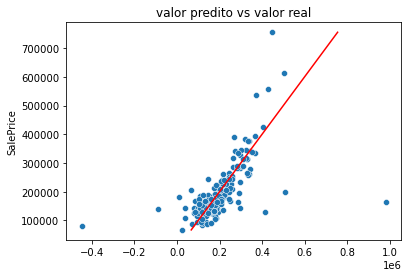

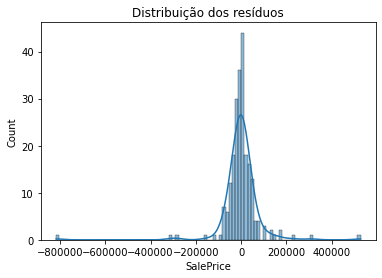


####################################################


Métricas de avaliação:
R^2: 0.05056014584326107
MAE: 40825.50801641602
MSE: 7488536877.235612
RMSE: 86536.33270040747

Performance da base de treino:
R^2: 0.9737847322390363
MAE: 9103.739567265138
MSE: 173205716.89034107
RMSE: 13160.764297347669


In [46]:
########################################################
########################################################
########################################################
# leitura e separação de features/target

df = pd.read_csv("../datasets/house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]


########################################################
########################################################
########################################################
# pré-processamento

# importando a classe PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# intanciando o objeto de transformação (atenção ao parâmetro "degree" e "include bias")
poly_transf = PolynomialFeatures(degree=2, include_bias = False)

# ajustando o transformer aos dados
poly_transf.fit(X)

# transformando os dados 
X_transf = poly_transf.transform(X)

# features transformdas com o grau desejado
X_df = pd.DataFrame(X_transf, columns = [f"X_{i+1}" for i in range(X_transf.shape[1])])

########################################################
########################################################
########################################################
# MODELAGEM

# 1)
from sklearn.linear_model import Ridge

# 2)
estimador = Ridge(alpha=20)

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# 5) METRICAS DE TREINO
print("\nPerformance da base de treino:")
y_pred_train = modelo.predict(X_train)

print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2298904408.1337805, tolerance: 591992131.260384
  model = cd_fast.enet_coordinate_descent(


Intercepto: -1266858.0518941742
Coeficienter angular: [-8.66019305e+01  9.76858864e+02  1.01058191e+00 ... -1.24282378e-01
 -1.52238852e-04  3.26250755e-05]

####################################################



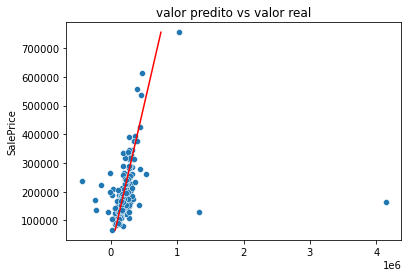

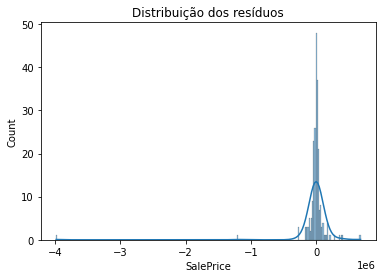


####################################################


Métricas de avaliação:
R^2: -9.813629567237363
MAE: 73522.34773133072
MSE: 85290567313.4446
RMSE: 292045.4884319301

Performance da base de treino:
R^2: 0.9994489347673617
MAE: 883.5763649341324
MSE: 3640918.320681389
RMSE: 1908.1190530680701


In [51]:
# lasso

########################################################
########################################################
########################################################
# leitura e separação de features/target

df = pd.read_csv("../datasets/house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]


########################################################
########################################################
########################################################
# pré-processamento

# importando a classe PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# intanciando o objeto de transformação (atenção ao parâmetro "degree" e "include bias")
poly_transf = PolynomialFeatures(degree=3, include_bias = False)

# ajustando o transformer aos dados
poly_transf.fit(X)

# transformando os dados 
X_transf = poly_transf.transform(X)

# features transformdas com o grau desejado
X_df = pd.DataFrame(X_transf, columns = [f"X_{i+1}" for i in range(X_transf.shape[1])])

########################################################
########################################################
########################################################
# MODELAGEM

# 1)
from sklearn.linear_model import Lasso

# 2)
estimador = Lasso(alpha=10, max_iter=5e3)

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# 5) METRICAS DE TREINO
print("\nPerformance da base de treino:")
y_pred_train = modelo.predict(X_train)

print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108868382744.6051, tolerance: 591992131.260384
  model = cd_fast.enet_coordinate_descent(


Intercepto: 563822.5948308914
Coeficienter angular: [-4.53981656e+01 -6.22715704e+00 -2.90307428e-01 -1.40523919e+01
  0.00000000e+00 -1.90803702e+02 -1.77991029e+02 -8.08472609e+00
 -1.28855627e+01  4.63143471e+00 -5.29792108e+00 -1.54973978e+01
 -7.35752959e+00  1.48069055e+01  1.48613970e+01  6.27601624e+00
  3.84950491e-01  0.00000000e+00 -4.20177878e+00  1.09873879e+00
  7.40451547e+00  0.00000000e+00  1.08865468e+01  3.09449335e+00
 -1.12106424e+02 -6.32358019e-01 -9.37592447e+00 -6.21735590e+01
 -2.36285574e+01 -1.78043507e+01 -2.31139687e+01  5.15081104e+01
 -4.18252056e+00  1.79399606e+01  4.11237408e+00  0.00000000e+00
  5.55046447e-01 -2.61920747e+00  1.22702734e-02  1.01375680e+01
  3.25135087e+01 -9.67247621e-02  2.08089614e-02  2.88057208e-01
 -2.31424734e-01 -4.12688221e-02 -1.09773388e-01  4.32289299e-03
  2.23790325e-01 -3.85663862e-01 -1.38543322e+00 -8.02883953e-02
 -4.16593056e+01 -2.78281348e+01  4.61861798e+01  1.48249571e+02
 -3.77362440e+01  2.93253133e+02 -8.34

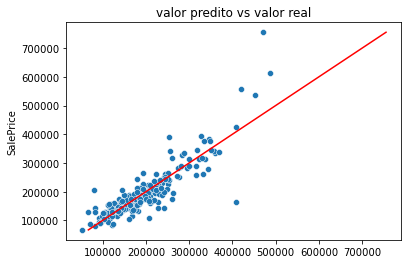

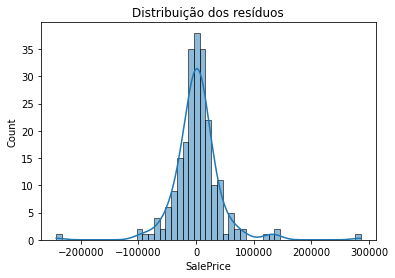


####################################################


Métricas de avaliação:
R^2: 0.7737724591809679
MAE: 25696.545316573403
MSE: 1784329228.0734327
RMSE: 42241.321334369175

Performance da base de treino:
R^2: 0.963998056498448
MAE: 10819.949396488837
MSE: 237866822.1316929
RMSE: 15422.93169704427


In [54]:
# elastic net

########################################################
########################################################
########################################################
# leitura e separação de features/target

df = pd.read_csv("../datasets/house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]


########################################################
########################################################
########################################################
# pré-processamento

# importando a classe PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# intanciando o objeto de transformação (atenção ao parâmetro "degree" e "include bias")
poly_transf = PolynomialFeatures(degree=2, include_bias = False)

# ajustando o transformer aos dados
poly_transf.fit(X)

# transformando os dados 
X_transf = poly_transf.transform(X)

# features transformdas com o grau desejado
X_df = pd.DataFrame(X_transf, columns = [f"X_{i+1}" for i in range(X_transf.shape[1])])

########################################################
########################################################
########################################################
# MODELAGEM

# 1)
from sklearn.linear_model import ElasticNet

# 2)
estimador = ElasticNet(alpha=1, l1_ratio=0.5, max_iter=2e3, selection="random")

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# 5) METRICAS DE TREINO
print("\nPerformance da base de treino:")
y_pred_train = modelo.predict(X_train)

print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

### Tips

Intercepto: 0.5681370921350046
Coeficienter angular: [0.09088117 0.26501754]

####################################################



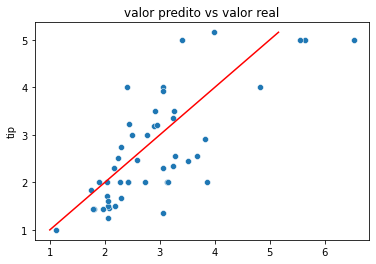

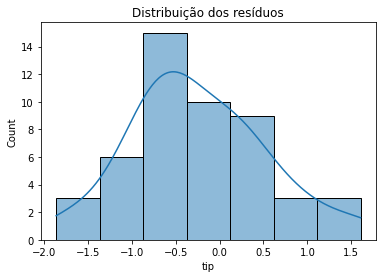


####################################################


Métricas de avaliação:
R^2: 0.4811084097989494
MAE: 0.6639235737596481
MSE: 0.6485996190543513
RMSE: 0.805356827160701

Performance da base de treino:
R^2: 0.4516422761023764
MAE: 0.7633095073405518
MSE: 1.1141024702219378
RMSE: 1.055510525869798


In [57]:
# elastic net

########################################################
########################################################
########################################################
# leitura e separação de features/target

df = pd.read_csv("../datasets/tips.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["tip"])
y = df["tip"]


########################################################
########################################################
########################################################
# pré-processamento

# importando a classe PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# intanciando o objeto de transformação (atenção ao parâmetro "degree" e "include bias")
poly_transf = PolynomialFeatures(degree=1, include_bias = False)

# ajustando o transformer aos dados
poly_transf.fit(X)

# transformando os dados 
X_transf = poly_transf.transform(X)

# features transformdas com o grau desejado
X_df = pd.DataFrame(X_transf, columns = [f"X_{i+1}" for i in range(X_transf.shape[1])])

########################################################
########################################################
########################################################
# MODELAGEM

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# 5) METRICAS DE TREINO
print("\nPerformance da base de treino:")
y_pred_train = modelo.predict(X_train)

print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.8903180138374, tolerance: 0.03961829517948719
  model = cd_fast.enet_coordinate_descent(


Intercepto: 1.593504742283546
Coeficienter angular: [ 0.00000000e+00  0.00000000e+00  6.75932696e-03  0.00000000e+00
  0.00000000e+00 -3.20900558e-04  8.06986701e-04  0.00000000e+00
  0.00000000e+00  3.93543533e-06 -3.44691450e-06 -3.30398473e-05
  0.00000000e+00  0.00000000e+00]

|b|_2 = 1.593519315071128

####################################################



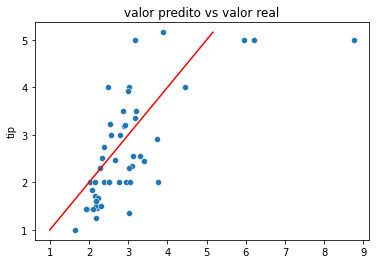

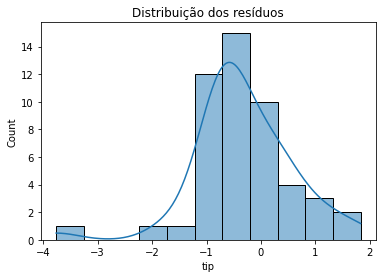


####################################################


Métricas de avaliação:
R^2: 0.2699604532845645
MAE: 0.7388600194080486
MSE: 0.9125285143102403
RMSE: 0.955263583682661

Performance da base de treino:
R^2: 0.49660814438660084
MAE: 0.7524297840787858
MSE: 1.0227449808534073
RMSE: 1.0113085487888487


In [82]:
# elastic net

########################################################
########################################################
########################################################
# leitura e separação de features/target

df = pd.read_csv("../datasets/tips.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["tip"])
y = df["tip"]


########################################################
########################################################
########################################################
# pré-processamento

# importando a classe PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# intanciando o objeto de transformação (atenção ao parâmetro "degree" e "include bias")
poly_transf = PolynomialFeatures(degree=4, include_bias = False)

# ajustando o transformer aos dados
poly_transf.fit(X)

# transformando os dados 
X_transf = poly_transf.transform(X)

# features transformdas com o grau desejado
X_df = pd.DataFrame(X_transf, columns = [f"X_{i+1}" for i in range(X_transf.shape[1])])

########################################################
########################################################
########################################################
# MODELAGEM


estimador = ElasticNet(alpha=5, l1_ratio=0.5, max_iter=2e3, selection="random")
# estimador = Ridge(alpha=20)
# estimador = Lasso(alpha=10, max_iter=5e3)
# estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

# note que passamos o novo dataframe de features
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)
print(f"\n|b|_2 = {np.linalg.norm(np.array(modelo.coef_.tolist() + [modelo.intercept_]), ord=2)}")

print("\n####################################################\n")

# 5)
y_pred = modelo.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)

range_y_test = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(range_y_test, range_y_test, "red")

plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# 5) METRICAS DE TREINO
print("\nPerformance da base de treino:")
y_pred_train = modelo.predict(X_train)

print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

_____

Uma pergunta importante é: **como selecionar um valor adequado para os parâmetros de regularização?**

Naturalmente, este é um hiperarâmetro bastante importante, dado que ele controla a "força" da regularização a ser aplicada.

Uma abordagem para a escolha de valores adequados de hiperparâmetros (processo chamado de **hyperparameter tuning**) é testar exaustivamente vários valores com o processo de **validação cruzada**, de modo a encontrarmos os melhores valores (e/ou combinação de valores) de hiperparâmetros.

Antes de nos aprofundarmos no processo de tuning, vamos entender melhor o que é a validação cruzada!

Para isso, veja o notebook da próxima aula! ;)